# Import Libraries and Load Data

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/fetal_health.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
#Check for null Values
df.isna().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


In [ ]:
# Check class distribution
print("\nClass Distribution:")
df['fetal_health'].value_counts()


Class Distribution:


,count
fetal_health,
1.0,1655
2.0,295
3.0,176


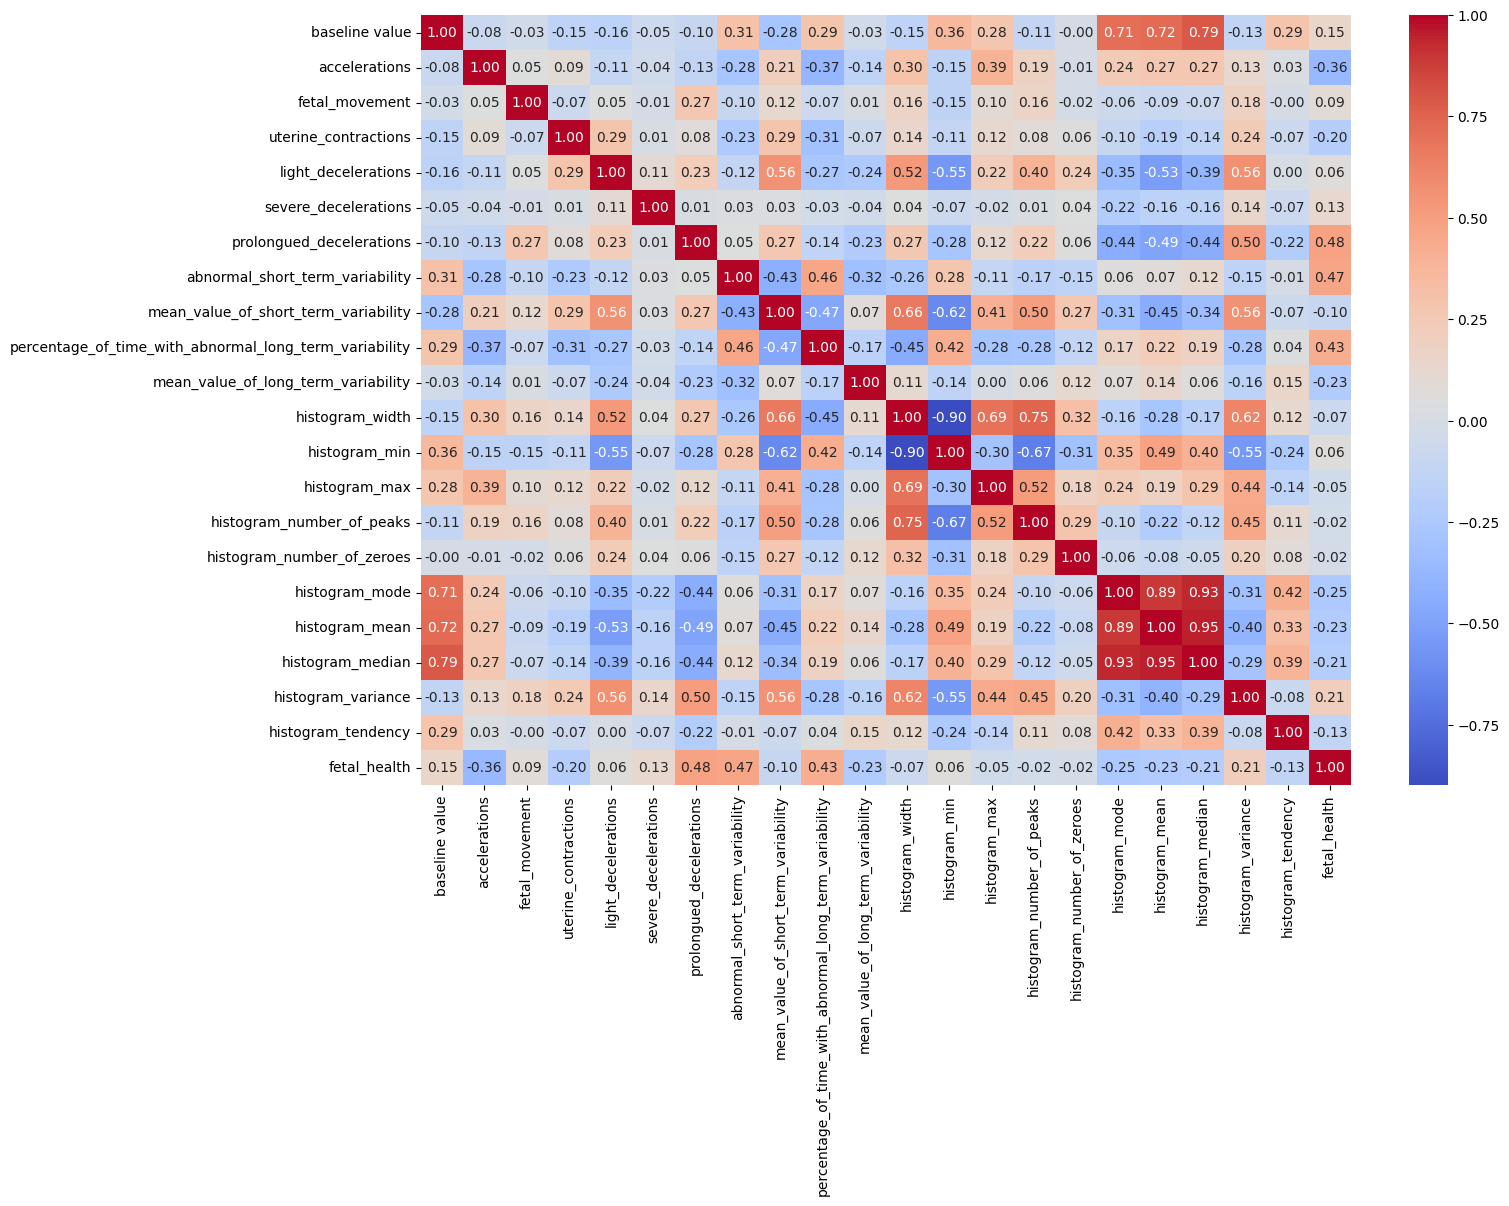

In [ ]:
# Correlation analysis to identify redundant features
import  seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
# Separate features and target
X = df.drop(columns=['fetal_health'])
y = df['fetal_health']

 # Feature Selection


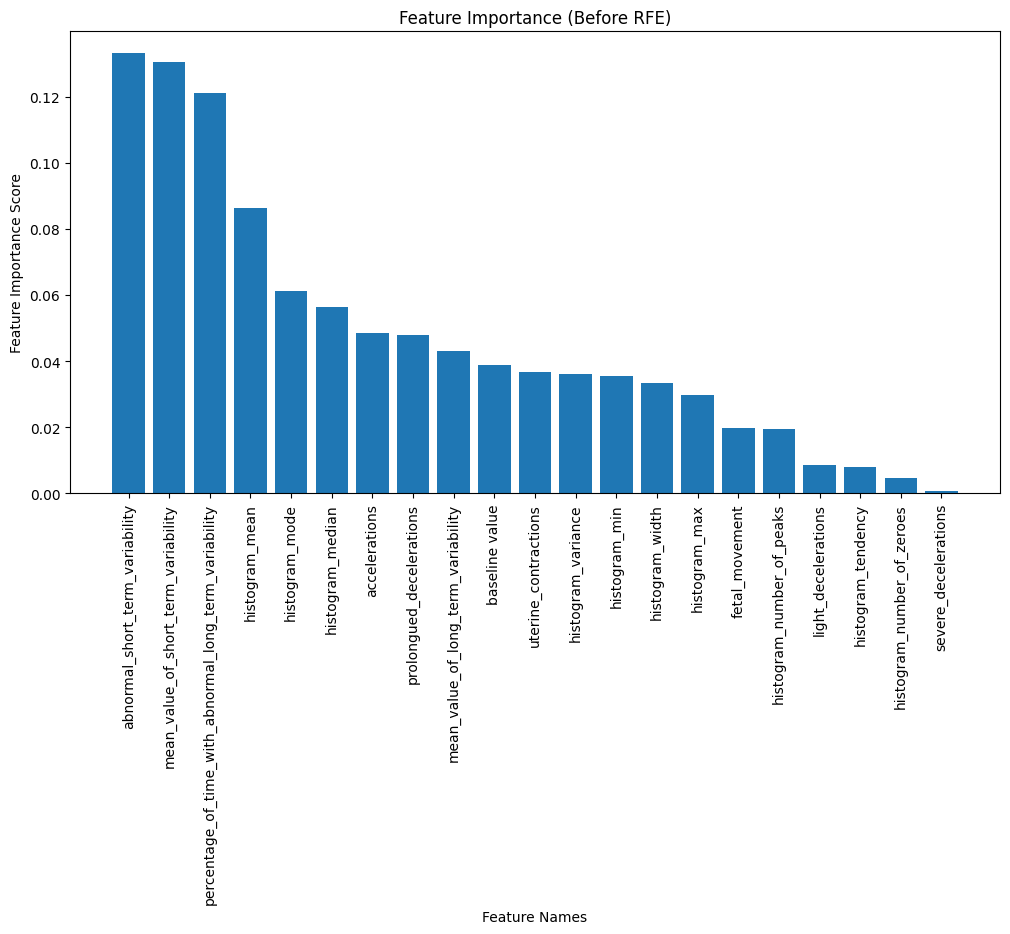

In [ ]:
# 1 Feature Importance Graph BEFORE RFE (All Features)
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(len(X.columns)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(X.columns)), X.columns[sorted_idx], rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance (Before RFE)')
plt.show()

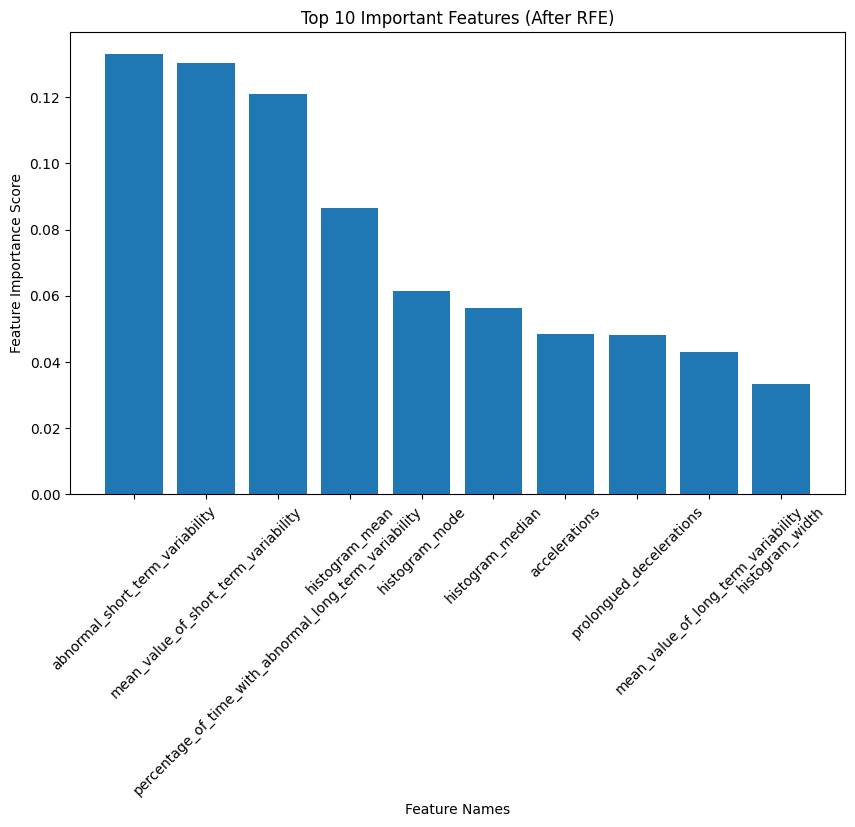

In [ ]:
# 2 Feature Selection Using RFE
rfe_selector = RFE(rf_model, n_features_to_select=10)
X_selected = rfe_selector.fit_transform(X, y)
selected_features = X.columns[rfe_selector.support_]

# 3 Feature Importance Graph AFTER RFE (Selected Features)
selected_importance = feature_importance[rfe_selector.support_]
sorted_idx_selected = np.argsort(selected_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), selected_importance[sorted_idx_selected], align='center')
plt.xticks(range(len(selected_features)), np.array(selected_features)[sorted_idx_selected], rotation=45)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance Score')
plt.title('Top 10 Important Features (After RFE)')
plt.show()

In [ ]:
# 4 Apply SMOTE (Balancing the Classes)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# 5 Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# 6 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

Base Models


 Logistic Regression Metrics
              precision    recall  f1-score   support

         1.0       0.92      0.85      0.89       331
         2.0       0.78      0.85      0.81       331
         3.0       0.86      0.85      0.85       331

    accuracy                           0.85       993
   macro avg       0.86      0.85      0.85       993
weighted avg       0.86      0.85      0.85       993



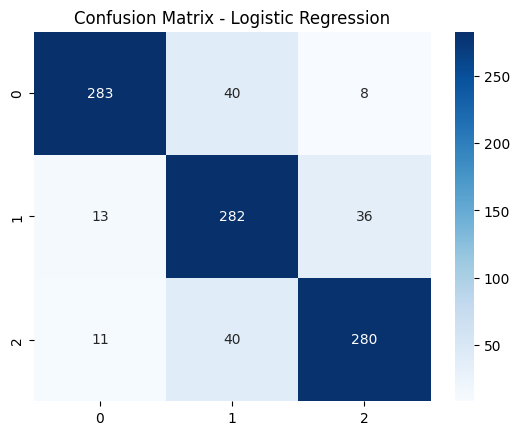

In [ ]:
# Machine Learning Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
import lightgbm as lgbm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\n Logistic Regression Metrics")
print(classification_report(y_test, y_pred_log))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


 KNN Metrics
              precision    recall  f1-score   support

         1.0       1.00      0.91      0.95       331
         2.0       0.91      0.99      0.95       331
         3.0       0.99      0.98      0.99       331

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993



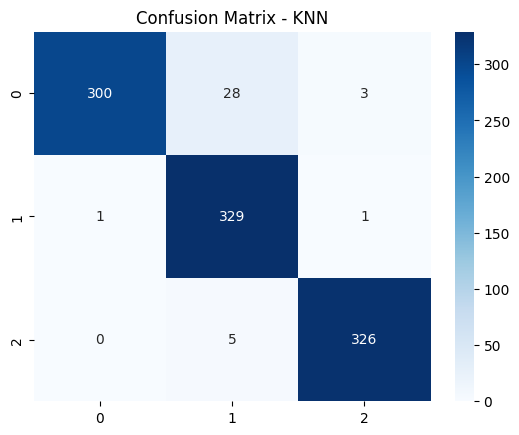

In [ ]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("\n KNN Metrics")
print(classification_report(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.show()


 Naïve Bayes Metrics
              precision    recall  f1-score   support

         1.0       0.91      0.79      0.85       331
         2.0       0.69      0.86      0.76       331
         3.0       0.86      0.75      0.80       331

    accuracy                           0.80       993
   macro avg       0.82      0.80      0.80       993
weighted avg       0.82      0.80      0.80       993



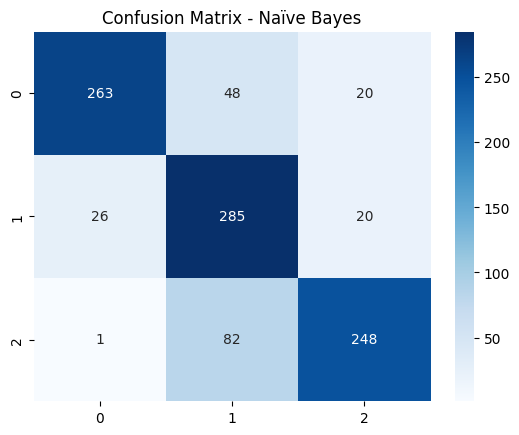

In [ ]:
#  Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("\n Naïve Bayes Metrics")
print(classification_report(y_test, y_pred_nb))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()


 SVM Metrics
              precision    recall  f1-score   support

         1.0       0.94      0.86      0.90       331
         2.0       0.80      0.88      0.84       331
         3.0       0.88      0.86      0.87       331

    accuracy                           0.87       993
   macro avg       0.87      0.87      0.87       993
weighted avg       0.87      0.87      0.87       993



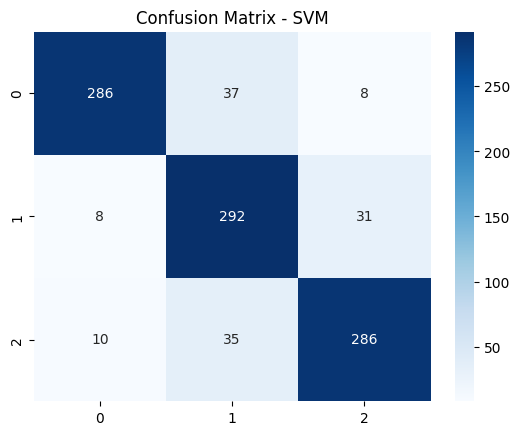

In [ ]:
#  Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\n SVM Metrics")
print(classification_report(y_test, y_pred_svm))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.show()


 Decision Tree Metrics
              precision    recall  f1-score   support

         1.0       0.96      0.93      0.94       331
         2.0       0.93      0.96      0.94       331
         3.0       0.99      0.99      0.99       331

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993



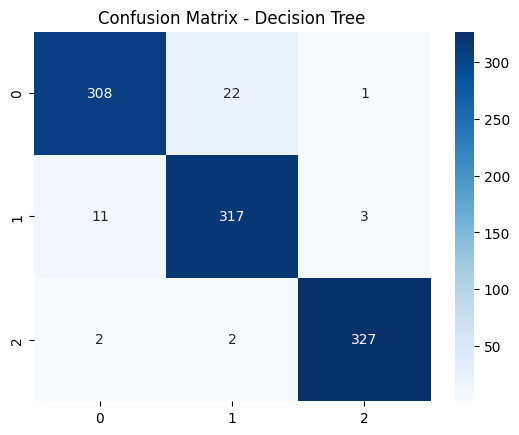

In [ ]:
#  Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\n Decision Tree Metrics")
print(classification_report(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

Ensemble Models


 Random Forest Metrics
              precision    recall  f1-score   support

         1.0       0.98      0.95      0.96       331
         2.0       0.94      0.98      0.96       331
         3.0       0.99      0.99      0.99       331

    accuracy                           0.97       993
   macro avg       0.97      0.97      0.97       993
weighted avg       0.97      0.97      0.97       993



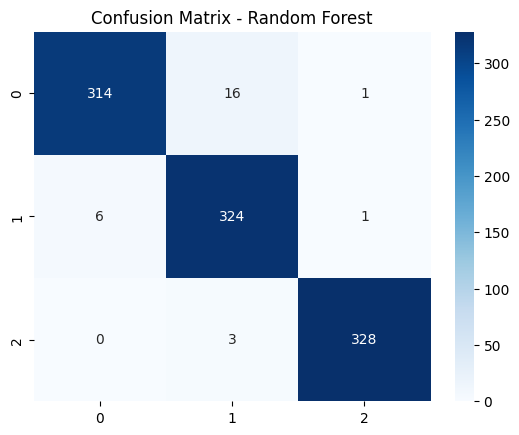

In [ ]:
#  Random Forest (Bagging)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n Random Forest Metrics")
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()


 Gradient Boosting Metrics
              precision    recall  f1-score   support

         1.0       0.97      0.93      0.95       331
         2.0       0.93      0.98      0.95       331
         3.0       1.00      0.99      0.99       331

    accuracy                           0.97       993
   macro avg       0.97      0.97      0.97       993
weighted avg       0.97      0.97      0.97       993



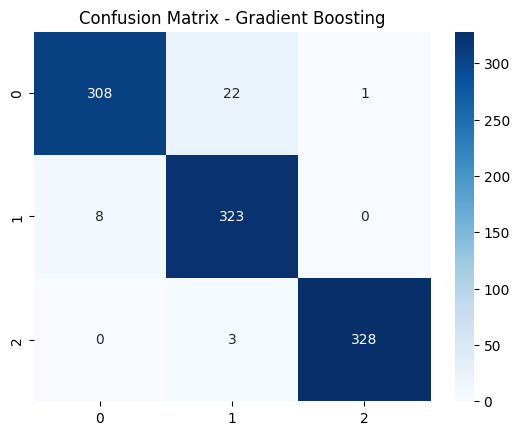

In [ ]:
#  Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("\n Gradient Boosting Metrics")
print(classification_report(y_test, y_pred_gb))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


 AdaBoost Metrics
              precision    recall  f1-score   support

         1.0       0.95      0.78      0.86       331
         2.0       0.81      0.97      0.88       331
         3.0       0.99      0.97      0.98       331

    accuracy                           0.91       993
   macro avg       0.92      0.91      0.91       993
weighted avg       0.92      0.91      0.91       993



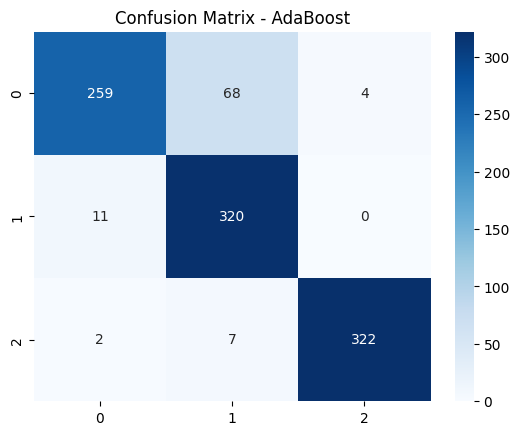

In [ ]:
#  AdaBoost Model
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)

print("\n AdaBoost Metrics")
print(classification_report(y_test, y_pred_adaboost))
sns.heatmap(confusion_matrix(y_test, y_pred_adaboost), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - AdaBoost")
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000729 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2546
[LightGBM] [Info] Number of data points in the train set: 3972, number of used features: 10
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

 LightGBM Metrics
              precision    recall  f1-score   support

         1.0       0.98      0.96      0.97       331
         2.0       0.96      0.98      0.97       331
         3.0       1.00      0.99      1.00       331

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993



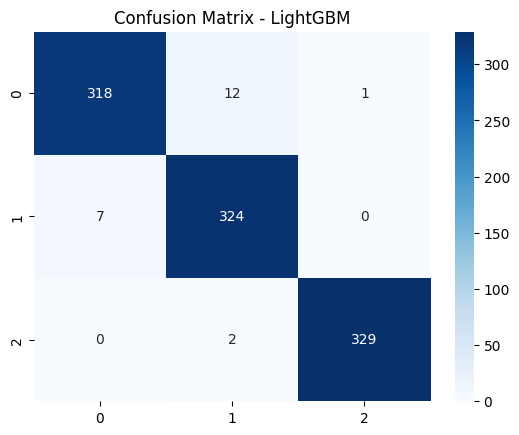

In [ ]:
#  LightGBM
lgb_model = lgbm.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

print("\n LightGBM Metrics")
print(classification_report(y_test, y_pred_lgb))
sns.heatmap(confusion_matrix(y_test, y_pred_lgb), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - LightGBM")
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2546
[LightGBM] [Info] Number of data points in the train set: 3972, number of used features: 10
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

 Voting Classifier Metrics
              precision    recall  f1-score   support

         1.0       0.97      0.96      0.97       331
         2.0       0.96      0.97      0.97       331
         3.0       1.00      0.99      0.99       331

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993



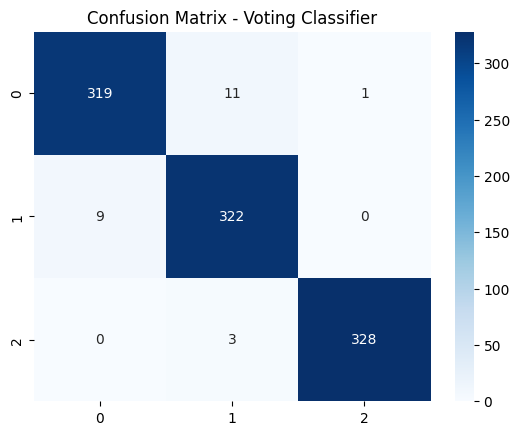

In [ ]:
# Voting Classifier (Majority Voting)
voting_model = VotingClassifier(estimators=[('rf', rf_model), ('lgb', lgb_model)], voting='hard')
voting_model.fit(X_train, y_train)
y_pred_voting = voting_model.predict(X_test)

print("\n Voting Classifier Metrics")
print(classification_report(y_test, y_pred_voting))
sns.heatmap(confusion_matrix(y_test, y_pred_voting), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Voting Classifier")
plt.show()

Model Comparison

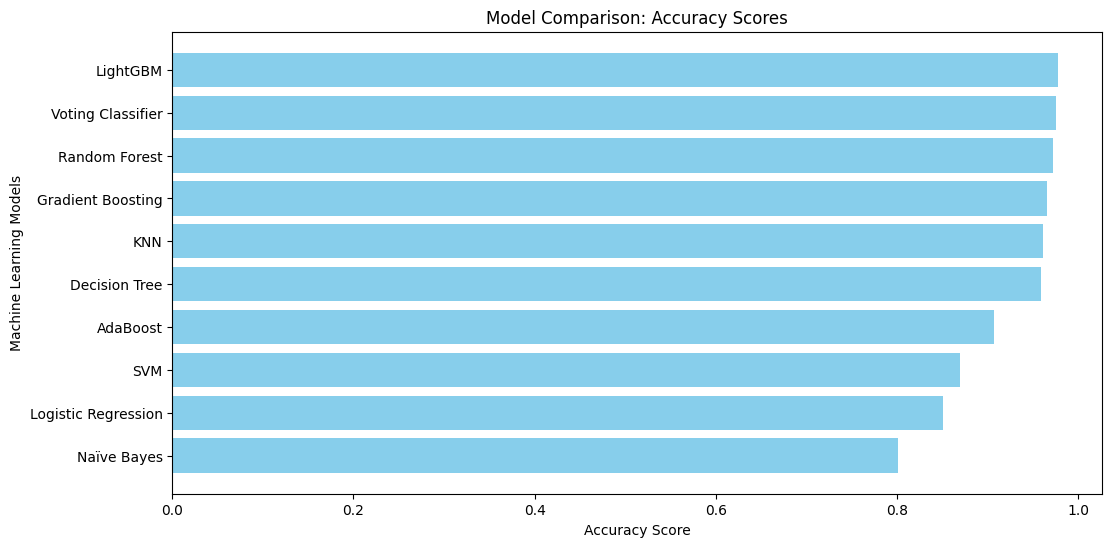

In [ ]:
# Collect model names and their accuracy scores
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Naïve Bayes": accuracy_score(y_test, y_pred_nb),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb),
    "LightGBM": accuracy_score(y_test, y_pred_lgb),
    "AdaBoost": accuracy_score(y_test, y_pred_adaboost),
    "Voting Classifier": accuracy_score(y_test, y_pred_voting)
}

# Sort models by accuracy
sorted_models = sorted(models.items(), key=lambda x: x[1], reverse=True)

# Plot accuracy scores
plt.figure(figsize=(12, 6))
plt.barh([m[0] for m in sorted_models], [m[1] for m in sorted_models], color='skyblue')
plt.xlabel("Accuracy Score")
plt.ylabel("Machine Learning Models")
plt.title("Model Comparison: Accuracy Scores")
plt.gca().invert_yaxis()  # Highest accuracy at the top
plt.show()



 Model Performance Comparison
                     Accuracy  Precision
Logistic Regression  0.850957   0.855009
KNN                  0.961732   0.964465
Naïve Bayes          0.801611   0.818252
SVM                  0.870091   0.874329
Decision Tree        0.958711   0.959012
Random Forest        0.972810   0.973265
Gradient Boosting    0.965760   0.966602
LightGBM             0.977845   0.978004
AdaBoost             0.907351   0.916688
Voting Classifier    0.975831   0.975952


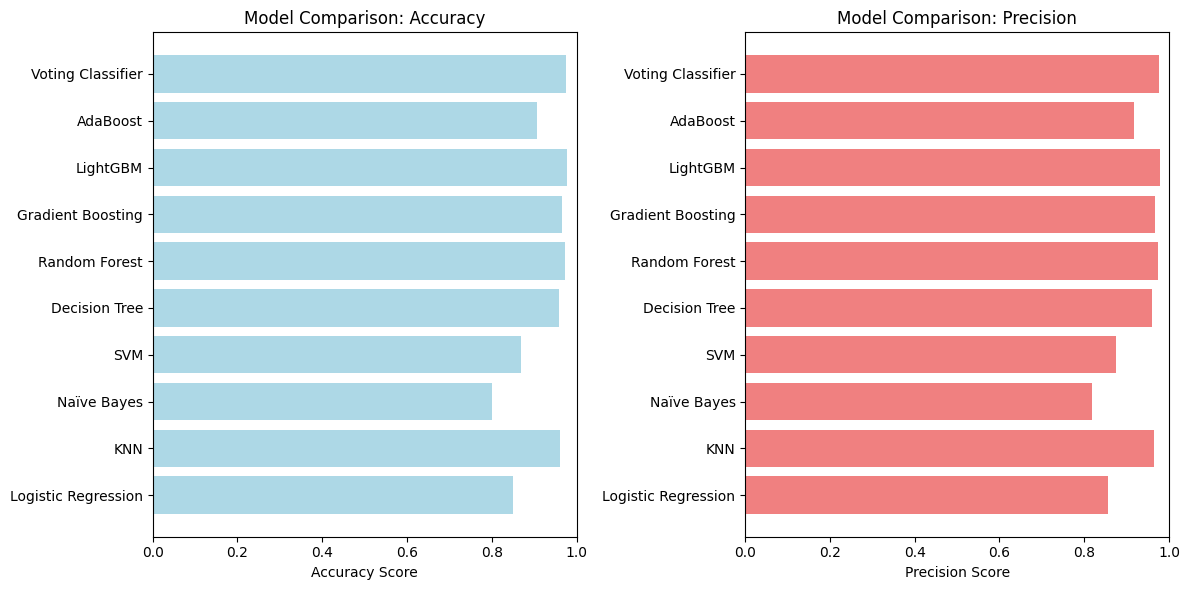

In [ ]:
from sklearn.metrics import precision_score

# Dictionary to store model performances
model_results = {}

# Define all models
models = {
    "Logistic Regression": log_model,
    "KNN": knn_model,
    "Naïve Bayes": nb_model,
    "SVM": svm_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "LightGBM": lgb_model,
    "AdaBoost": adaboost_model,
    "Voting Classifier": voting_model
}

# Compute accuracy & precision for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multi-class
    model_results[name] = {"Accuracy": accuracy, "Precision": precision}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(model_results).T
print("\n Model Performance Comparison")
print(results_df)

# Plot Accuracy & Precision Comparison Graph
plt.figure(figsize=(12, 6))

# Accuracy Bar Chart
plt.subplot(1, 2, 1)
plt.barh(results_df.index, results_df["Accuracy"], color='lightblue')
plt.xlabel("Accuracy Score")
plt.title("Model Comparison: Accuracy")
plt.xlim(0, 1)

# Precision Bar Chart
plt.subplot(1, 2, 2)
plt.barh(results_df.index, results_df["Precision"], color='lightcoral')
plt.xlabel("Precision Score")
plt.title("Model Comparison: Precision")
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

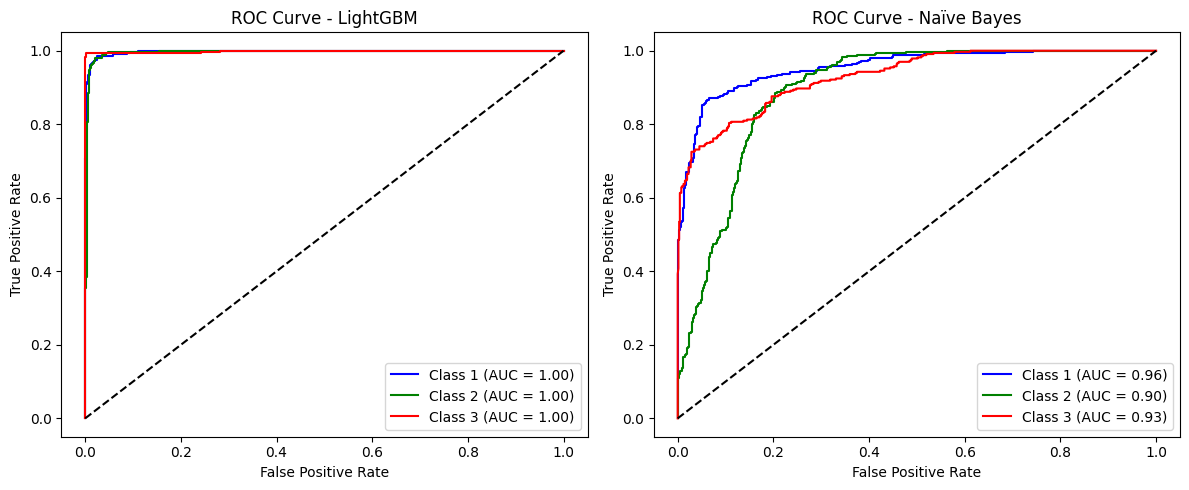

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels for multi-class classification (One-vs-Rest strategy)
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_score_lgb = lgb_model.predict_proba(X_test)
y_score_nb = nb_model.predict_proba(X_test)

# Define colors for different classes
colors = cycle(["blue", "green", "red"])

plt.figure(figsize=(12, 5))

# =======  LightGBM ROC Curve =======
plt.subplot(1, 2, 1)
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_lgb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f'Class {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], "k--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LightGBM")
plt.legend(loc="lower right")

# =======  Naïve Bayes ROC Curve =======
plt.subplot(1, 2, 2)
colors = cycle(["blue", "green", "red"])  # Reset colors
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_nb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f'Class {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], "k--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naïve Bayes")
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=100, random_state=42))
]

# Meta-model (final decision maker)
meta_model = LogisticRegression()

# Create stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Evaluate model
y_pred_stack = stacking_clf.predict(X_test)

# Print accuracy and precision
from sklearn.metrics import accuracy_score, precision_score

print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Stacking Classifier Precision:", precision_score(y_test, y_pred_stack, average='weighted'))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2546
[LightGBM] [Info] Number of data points in the train set: 3972, number of used features: 10
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2529
[LightGBM] [Info] Number of data points in the train set: 3177, number of used features: 10
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Inf